In [1]:
pip install pmdarima


     |████████████████████████████████| 1.4 MB 10.5 MB/s 
     |████████████████████████████████| 9.8 MB 37.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
# check pmdarima

from pmdarima.arima import auto_arima

### ARIMA


In [3]:
from IPython.core.debugger import set_trace


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [4]:
df = pd.read_excel("/ASIANPAINT (1).xlsx")
df.shape

(1229, 2)

#### Fitting the ARIMA model

In [5]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm



In [6]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(df.Adj_Close, order=(1, 1, 1))
result = model.fit()
result.params

ar.L1       0.297128
ma.L1      -0.311499
sigma2    278.266065
dtype: float64

In [7]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj_Close   No. Observations:                 1229
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5198.407
Date:                Sun, 24 Apr 2022   AIC                          10402.814
Time:                        09:48:17   BIC                          10418.153
Sample:                             0   HQIC                         10408.585
                               - 1229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2971      1.663      0.179      0.858      -2.963       3.557
ma.L1         -0.3115      1.656     -0.188      0.851      -3.558       2.935
sigma2       278.2661      6.856     40.590      0.0

In [8]:
x=result.predict(type='levels')

print(df.shape)
df.head()

(1229, 2)


,Date,Adj_Close
0,2015-01-01,714.732971
1,2015-01-02,739.443176
2,2015-01-05,739.395447
3,2015-01-06,721.745300
4,2015-01-07,736.247131


Text(0.5, 1.0, 'ARIMA-Asian_Paints')

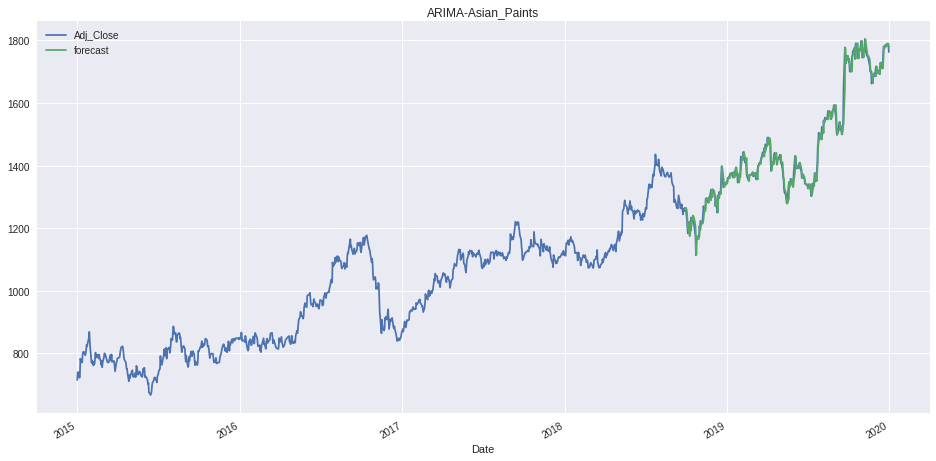

In [9]:
df['forecast']=result.predict(start=924,type='levels')
df.set_index('Date',inplace=True)
df[['Adj_Close','forecast']].plot(figsize=(16, 8))
plt.title('ARIMA-Asian_Paints')



### RMSE Value Calculation


In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(df['Adj_Close'][924:len(df)],df['forecast'][924:len(df)]))
print("RMSE=",rms)

RMSE= 22.087966661731272
